# Google Colab-specific Setup

In [0]:
import gdown
from zipfile import ZipFile
gdown.download('https://drive.google.com/uc?export=download&id=11C8lWqT1Bqva_2NYkoGMqvX5ZF5SVJ4k', 'sls_data.zip', quiet=True)

with ZipFile('sls_data.zip', 'r') as zipObj:
   zipObj.extractall()

# Setup and Configuration

In [0]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random

In [0]:
data = pd.read_csv("selected_food.csv")

In [0]:
def getReward(previousState, action):
    
    c_food = data[data['Label']==action]
    
    if len(previousState) == 0:
        return int(c_food['Utility'])
    
    p_food = data[data['Label']==previousState]
    
    p_cabohydrate = float(p_food['Carbohydrate'])
    p_fat = float(p_food['Fat'])
    p_protein = float(p_food['Protein'])
    
    c_cabohydrate = float(c_food['Carbohydrate'])
    c_fat = float(c_food['Fat'])
    c_protein = float(c_food['Protein'])
    utility = int(c_food['Utility'])
    
    #Use Euclidean distance to estimate similarity between food
    dst = math.sqrt((p_cabohydrate-c_cabohydrate)**2+(p_fat-c_fat)**2+(p_protein-c_protein)**2)
    
    if dst > 0.6:
        reward = utility
    elif dst > 0.4:
        reward = utility *0.8
    elif dst > 0.2:
        reward = utility *0.6
    else:
        reward = utility*0.4
    return reward
    

# Q-Learning

In [0]:
initial_lr = 1.0 
min_lr = 0.003
eps = 0.05
gamma = 0.95
iter_max = 250000
t_max = 21
qtable = {}
total_reward_list = []

for i in range(iter_max):

    uneaten = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U']


    state = ""
    next_state = ""
    next2_best_state = ""
    total_reward = 0
    
    ## eta: learning rate is decreased at each step
    eta = max(min_lr, initial_lr * (0.85 ** (i//2000)))
    for j in range(t_max):
        
        if np.random.uniform(0, 1) < eps:
            action = uneaten[random.randint(0, len(uneaten)-1)]
        else:
            index = 0
            highestValue = 0
            for k in range(len(uneaten)):
                temp_state = state
                temp_state += uneaten[k]
                if temp_state in qtable.keys():
                    if qtable[temp_state] > highestValue:
                        index = k
                        highestValue = qtable[temp_state]      
            action = uneaten[index]
              
        uneaten.remove(action)
        next_state += action 

        reward = getReward(state[len(state)-1:], next_state[len(next_state)-1:])
        total_reward += (gamma ** j) * reward
        
        #Find next best state
        
        next2_best_state = next_state
        index = 0
        highestValue = 0
        for k in range(len(uneaten)):
            temp_state = state
            temp_state += uneaten[k]
            if temp_state in qtable.keys():
                if qtable[temp_state] > highestValue:
                    index = k
                    highestValue = qtable[temp_state]
        
        if len(uneaten) > 0:
            next2_best_state += uneaten[index]
        
        
        # update q table
        if next_state not in qtable.keys():
            qtable[next_state] = 0
        if next2_best_state not in qtable.keys():
            qtable[next2_best_state] = 0
        
        if len(uneaten) > 0:
            qtable[next_state] = qtable[next_state] + eta * (reward + gamma *  qtable[next2_best_state] - qtable[next_state])
        
        state = next_state
        
    
    total_reward_list
    
    if i % 1000 == 0:
        total_reward_list.append(total_reward)
        print('Iteration #%d -- Total reward = %d.' %(i+1, total_reward))



Iteration #1 -- Total reward = 672.
Iteration #1001 -- Total reward = 825.
Iteration #2001 -- Total reward = 770.
Iteration #3001 -- Total reward = 852.
Iteration #4001 -- Total reward = 849.
Iteration #5001 -- Total reward = 847.
Iteration #6001 -- Total reward = 855.
Iteration #7001 -- Total reward = 849.
Iteration #8001 -- Total reward = 849.
Iteration #9001 -- Total reward = 849.
Iteration #10001 -- Total reward = 822.
Iteration #11001 -- Total reward = 827.
Iteration #12001 -- Total reward = 841.
Iteration #13001 -- Total reward = 849.
Iteration #14001 -- Total reward = 850.
Iteration #15001 -- Total reward = 700.
Iteration #16001 -- Total reward = 774.
Iteration #17001 -- Total reward = 810.
Iteration #18001 -- Total reward = 850.
Iteration #19001 -- Total reward = 850.
Iteration #20001 -- Total reward = 852.
Iteration #21001 -- Total reward = 738.
Iteration #22001 -- Total reward = 714.
Iteration #23001 -- Total reward = 849.
Iteration #24001 -- Total reward = 850.
Iteration #25

Iteration #203001 -- Total reward = 816.
Iteration #204001 -- Total reward = 846.
Iteration #205001 -- Total reward = 850.
Iteration #206001 -- Total reward = 849.
Iteration #207001 -- Total reward = 770.
Iteration #208001 -- Total reward = 735.
Iteration #209001 -- Total reward = 846.
Iteration #210001 -- Total reward = 763.
Iteration #211001 -- Total reward = 833.
Iteration #212001 -- Total reward = 850.
Iteration #213001 -- Total reward = 850.
Iteration #214001 -- Total reward = 836.
Iteration #215001 -- Total reward = 814.
Iteration #216001 -- Total reward = 845.
Iteration #217001 -- Total reward = 849.
Iteration #218001 -- Total reward = 803.
Iteration #219001 -- Total reward = 850.
Iteration #220001 -- Total reward = 850.
Iteration #221001 -- Total reward = 850.
Iteration #222001 -- Total reward = 850.
Iteration #223001 -- Total reward = 850.
Iteration #224001 -- Total reward = 789.
Iteration #225001 -- Total reward = 803.
Iteration #226001 -- Total reward = 850.
Iteration #22700

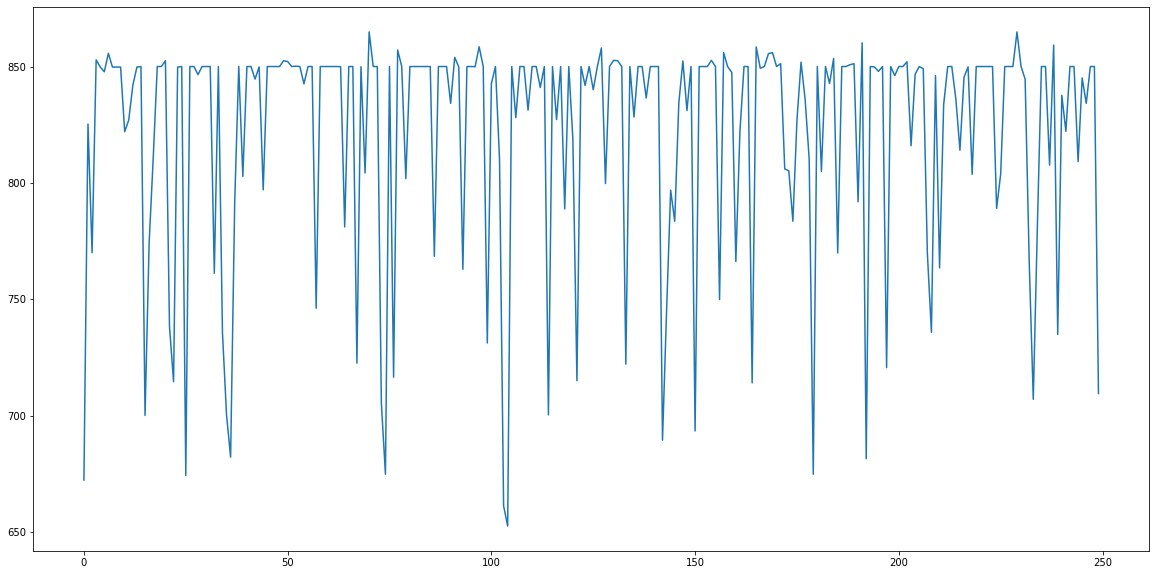

In [0]:
plt.figure(figsize=(20,10))
plt.plot(total_reward_list)
plt.show()

In [0]:

uneaten = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U']
action = uneaten[random.randint(0, len(uneaten)-1)]
uneaten.remove(action)
state = action

print("Day 1 Eating Plan")
print("")

c_food = data[data['Label']==action]
print(c_food.tail(1)['Food'].values[0])

count = 2

for i in range (20):
    index = 0
    highestValue = 0
    for j in range (len(uneaten)):
        temp_state = state
        temp_state += uneaten[j]
        if temp_state in qtable.keys():
            if qtable[temp_state] > highestValue:
                index = j
                highestValue = qtable[temp_state]      
                
    if (i+1) % 3 == 0:
        print("")
        print("Day", count, "Eating Plan")
        print("")
        count += 1
    action = uneaten[index]
    c_food = data[data['Label']==action]
    print(c_food.tail(1)['Food'].values[0])
    state += action
    uneaten.remove(action)



Day 1 Eating Plan

Ee Mee Seafood (Fried)
Fried Beehoon
Tau Suan

Day 2 Eating Plan

Shrimp Fried Rice
Ngoh Hiang Mixed Items
Braised Duck With Yam Rice

Day 3 Eating Plan

Fish and Chips
Laksa
Carbonara

Day 4 Eating Plan

Ipoh Horfun
Fried Hong Kong Noodles
Chicken Teriyaki Don

Day 5 Eating Plan

Fried Hokkien Noodles
Lor Mee
Fried Carrot Cake

Day 6 Eating Plan

Roti Prata with Egg (2 pieces)
Nasi Lemak
Pork Satay with Sauce (10 sticks)

Day 7 Eating Plan

Pizza (2 slices)
Butter Crab (500 gram)
Mac and Cheese


In [0]:
import pickle

In [0]:
with open('total_reward_list.pkl', 'wb') as f:
        pickle.dump(total_reward_list, f)

In [0]:
with open('qtable.pkl', 'wb') as f:
        pickle.dump(qtable, f)